# Práctica 2 - Regresion Polinomial & Feature engineering

**Curso:** Statistical Learning

**Catedrático:** Ing. Luis Leal

**Estudiante:** Dany Rafael Díaz Lux (21000864)

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [106]:
# Importar librerías que se utilizarán y habilitar compatibilidad con tf1
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import datetime as dt

if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [409]:
# Cargar información de archivo .csv y filtrar por datos de Guatemala y sólo días con casos reportados
covidInformation = pd.read_csv('covid_19_clean_complete.csv')
covidInformation = covidInformation[(covidInformation['Country/Region'] == 'Guatemala') & (covidInformation['Confirmed'] > 0)]
covidInformation = covidInformation.rename(columns = {'Country/Region': 'Country'}, inplace = False)
covidInformation = covidInformation[['Country', 'Date', 'Confirmed']]
covidInformation["DateNumber"] = pd.to_datetime(covidInformation["Date"]).astype(np.int64) // 86400000000000 - 18335
covidInformation["DateNumber"] = covidInformation["DateNumber"].astype(np.int32)
display(covidInformation)

,Country,Date,Confirmed,DateNumber
13851,Guatemala,3/14/20,1,0
14115,Guatemala,3/15/20,1,1
14379,Guatemala,3/16/20,2,2
14643,Guatemala,3/17/20,6,3
14907,Guatemala,3/18/20,6,4
15171,Guatemala,3/19/20,9,5
15435,Guatemala,3/20/20,12,6
15699,Guatemala,3/21/20,17,7
15963,Guatemala,3/22/20,19,8
16227,Guatemala,3/23/20,20,9


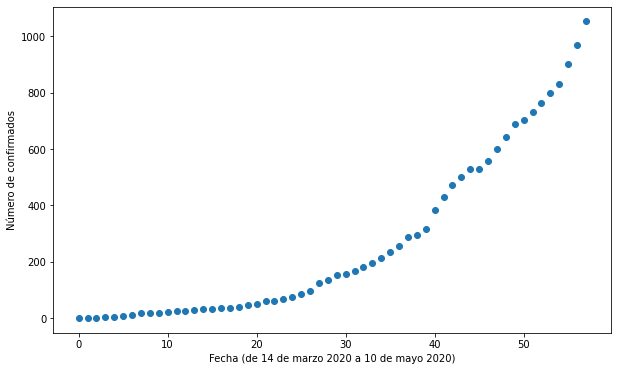

In [410]:
# Mostrar gráfica con fechas vs casos confirmados
plt.figure(figsize=(10,6))
plt.scatter(covidInformation["DateNumber"], covidInformation["Confirmed"])
plt.xlabel("Fecha (de 14 de marzo 2020 a 10 de mayo 2020)")
plt.ylabel("Número de confirmados")
plt.show()

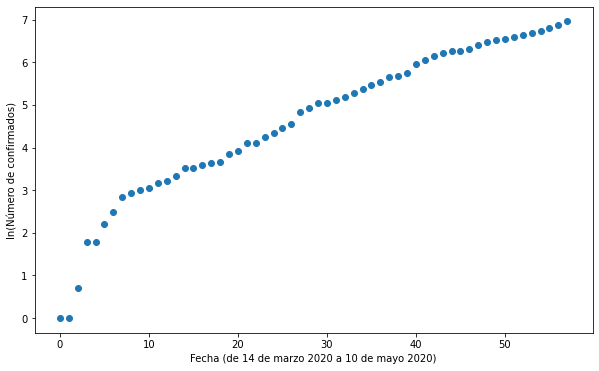

In [411]:
# Transformar casos confirmados como: logConfirmed = np.log(Confirmed)
covidInformation["lnConfirmed"] = np.log(covidInformation["Confirmed"])
# Graficar logConfirmed vs número de días
plt.figure(figsize=(10,6))
plt.scatter(covidInformation["DateNumber"], covidInformation["lnConfirmed"])
plt.xlabel("Fecha (de 14 de marzo 2020 a 10 de mayo 2020)")
plt.ylabel("ln(Número de confirmados)")
plt.show()

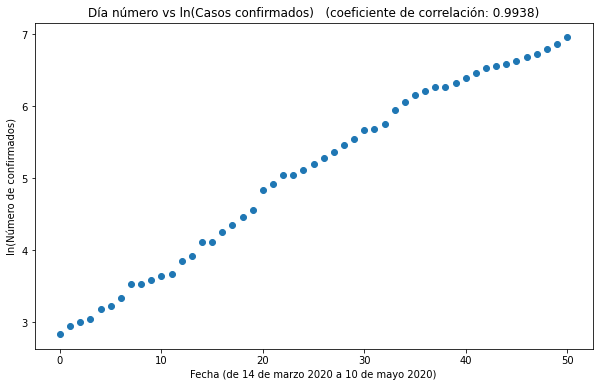

,Country,Date,Confirmed,DateNumber,lnConfirmed
15699,Guatemala,3/21/20,17,0,2.833213
15963,Guatemala,3/22/20,19,1,2.944439
16227,Guatemala,3/23/20,20,2,2.995732
16491,Guatemala,3/24/20,21,3,3.044522
16755,Guatemala,3/25/20,24,4,3.178054
17019,Guatemala,3/26/20,25,5,3.218876
17283,Guatemala,3/27/20,28,6,3.332205
17547,Guatemala,3/28/20,34,7,3.526361
17811,Guatemala,3/29/20,34,8,3.526361
18075,Guatemala,3/30/20,36,9,3.583519


In [634]:
# Los primeros 7 días no parecen seguir el mismo patrón que el resto de datos, por lo que se filtrarán y se volverá a graficar
# También se mostrará un coeficiente correlación entre los datos
covidInformation["DateNumber"] = covidInformation["DateNumber"] - 7
covidInformation = covidInformation[covidInformation['DateNumber'] >= 0]
# Calcular coeficiente de correlación
coef = round(covidInformation[["lnConfirmed", "DateNumber"]].corr()["lnConfirmed"]["DateNumber"],4)
# Graficar logConfirmed vs número de días
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)    
ax.scatter(covidInformation["DateNumber"], covidInformation["lnConfirmed"])
ax.set_title('Día número vs ln(Casos confirmados)   (coeficiente de correlación: ' + str(coef) + ')')
plt.xlabel("Fecha (de 14 de marzo 2020 a 10 de mayo 2020)")
plt.ylabel("ln(Número de confirmados)")
plt.show()
display(covidInformation)

### Comentarios entre relación "Día número" y "ln de casos confirmados"
* La relación que existe entre el número de día y el logaritmo natural del número de casos confirmados en Guatemala tiene un coeficiente de correlación muy alto (0.9938) por lo que se puede buscar un modelo lineal que ayude a predecir los siguientes números de casos esperados.
* La relación entre los datos podría cambiar en el futuro (debido a medidas sanitarias en el país, restricciones, etc.) por lo que este modelo tendrá menos poder predictivo mientras más tiempo pase.

In [770]:
# Definir modelo y funciones para aplicación de modelo - basado en código de primera práctica
class ModeloLineal:
    def __init__(self,parametrosIniciales):
        self.parametros = tf.get_variable(name="Parametros", dtype=tf.float32, initializer=parametrosIniciales, use_resource=True)
        
    def __call__(self,matrizX):
        return tf.matmul(matrizX, self.parametros)
    
    def actualizar(self,matrizX,y,learning_rate):
        with tf.name_scope("Prediccion"):
            prediccion = self(matrizX)
        
        with tf.name_scope("Error"):
            residuo = tf.math.subtract(prediccion, y)
            error = 0.5 * tf.reduce_mean(tf.math.square(residuo))
        
        with tf.name_scope("Gradiente"):
            gradiente = tf.gradients(error, self.parametros)
        
        with tf.name_scope("Actualizar_Parametros"):
            multGradLr = tf.math.multiply(gradiente, learning_rate)
            restarParametros = tf.math.subtract(self.parametros, multGradLr)
            actualizacionParametros = tf.assign(self.parametros, restarParametros[0])
            
        return actualizacionParametros
    
    def calcularError(self, matrizX, y):
        with tf.name_scope("Calcular_error_general"):
            prediccion = self(matrizX)
            residuo = tf.math.subtract(prediccion, y)
            error = 0.5 * tf.reduce_mean(tf.math.square(residuo))
            error_summary = tf.summary.scalar("Error", error)
        
        return error_summary, error
    
def agregarColumnaUnos(x):
    if len(x.shape) < 2:
        x = np.array(x).reshape(x.shape[0], -1)
    
    return np.append(x, np.ones(x.shape[0]).reshape(-1,1), 1)

def modeloLinealMiniBatch(x, y, epochs, learningRate, batchSize):
    x = agregarColumnaUnos(x)
    y = np.array(y).reshape(y.shape[0], -1)
    parametrosIniciales = np.zeros((x.shape[1], 1), dtype=np.float32)
    cantidadDatos = x.shape[0]
    if batchSize > cantidadDatos:
        batchSize = cantidadDatos
    totalIteraciones = cantidadDatos // batchSize
    g = tf.Graph()
    with g.as_default():
        modelo = ModeloLineal(parametrosIniciales)
        tensorX = tf.placeholder(tf.float32,[None, x.shape[1]],"tensorX")
        tensorY = tf.placeholder(tf.float32,[None, 1],"tensorY")
        calcularPrediccion = modelo(tensorX) #Esto creará la definición para la operación y = mx + b
        actualizarParametros = modelo.actualizar(tensorX, tensorY, learningRate) # Definición para actualizar parámetros
        calcularErrorGeneral = modelo.calcularError(tensorX, tensorY)
        directorioModelo = './summaries/' + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + '_RegresionLinealMiniBatchGradientDescent' \
            + '_epochs=' + str(epochs) + '_lr=' + str(learningRate) + '_batchSize=' + str(batchSize)

        with tf.train.MonitoredSession() as session:
            writer = tf.summary.FileWriter(directorioModelo, g)
            for epoch in range(epochs):
                for batch in range(totalIteraciones):
                    inicioBatch = batch * batchSize
                    finBatch = inicioBatch + batchSize - 1
                    if (cantidadDatos - finBatch) < batchSize:
                        finBatch = cantidadDatos
                    miniBatchX =  np.array(x[inicioBatch:finBatch,:])
                    miniBatchY = np.array(y[inicioBatch:finBatch])
                    # Realizar la actualización de parámetros por mini batch
                    feed_dict = {tensorX: miniBatchX, tensorY: miniBatchY}
                    # Si no es la última iteración sólo correr actualización de parámetros
                    if batch != totalIteraciones - 1:
                        session.run(actualizarParametros,feed_dict=feed_dict)
                    # De lo contrario obtener error final de epoch y parámetros
                    else:
                        parametros = session.run(actualizarParametros,feed_dict=feed_dict)
                
                # Calcular error general de modelo
                feed_dict = {tensorX: np.array(x), tensorY: np.array(y)}
                errorSummary, error = session.run(calcularErrorGeneral, feed_dict=feed_dict)
                
                # Añadir error a summary de tensorboard
                writer.add_summary(errorSummary, epoch)
                
            writer.close()
    
    print('Modelo MiniBatch. Epochs: ', epochs, ', learning rate: ', learningRate, ', Batch size: ', batchSize, \
          ', Error final: ', error, ', Parámetros: ', parametros)

### Grafo de Modelo a utilizar

<img src='Grafo_Modelo_a_utilizar.png'>

In [771]:
# Datos para aplicar modelo lineal
x = covidInformation["DateNumber"]
y = covidInformation["lnConfirmed"]
# Variaciones de valores para learning rate
learning_rates = [0.001, 0.003, 0.005]
epochs = [500]
bSizes = [4, 8, 16, 32]

for lr in learning_rates:
    for ep in epochs:
        for bSize in bSizes:
            modeloLinealMiniBatch(x, y, ep, lr, bSize)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  0.001 , Batch size:  4 , Error final:  0.12955895 , Parámetros:  [[0.09616928]
 [2.195805  ]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  0.001 , Batch size:  8 , Error final:  0.46950108 , Parámetros:  [[0.09448998]
 [1.754445  ]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  0.001 , Batch size:  16 , Error final:  0.66569763 , Parámetros:  [[0.11421017]
 [1.1422318 ]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  0.001 , Batch size:  32 , Error final:  0

### Gráficas de resultados anteriores

En la gráfica se incluyen sólo aquellas que no dieron como error final "nan" (por ser errores muy grandes). Se puede ver que un tamaño de batch y un learning rate pequeño darán los mejores resultados. Se procederá a realizar una nueva ronda de pruebas con valores de hiperparámetros más pequeños.

<img src='Graficas_de_errores_finales_por_modelo.png'>

In [619]:
# Segunda ronda de pruebas
learning_rates = [0.0001, 0.001, 0.002, 0.0025]
epochs = [500]
bSizes = [4, 8, 12]

for lr in learning_rates:
    for ep in epochs:
        for bSize in bSizes:
            modeloLinealMiniBatch(x, y, ep, lr, bSize)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  0.0001 , Batch size:  4 , Error final:  0.7955158 , Parámetros:  [[0.15885065 0.43283248]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  0.0001 , Batch size:  8 , Error final:  0.9253332 , Parámetros:  [[0.16491668 0.23614109]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  0.0001 , Batch size:  12 , Error final:  0.97596264 , Parámetros:  [[0.16738649 0.16308963]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  0.001 , Batch size:  4 , Error final:  0.12955895

### Gráficas de resultados

En esta segunda gráfica se incluyeron sólo los modelos con error final menor a 0.5. Se puede apreciar que el mejor error final (0.0322) lo tiene el modelo con hipérparámetros: learning rate = 0.002 y batch size: 4.

Se hará una última ronda de pruebas utilizando sólo batch size de 4, con más epochs y algunas variaciones en el tamaño del batch para observar si el error baja aún más o se mantiene su comportamiento.

<img src='Graficas_de_errores_finales_por_modelo_2.png'>

In [622]:
# Última ronda de pruebas
learning_rates = [0.001, 0.0015, 0.002]
epochs = [2500]
bSizes = [4]

for lr in learning_rates:
    for ep in epochs:
        for bSize in bSizes:
            modeloLinealMiniBatch(x, y, ep, lr, bSize)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  2500 , learning rate:  0.001 , Batch size:  4 , Error final:  0.021236422 , Parámetros:  [[0.08055975 2.935054  ]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  2500 , learning rate:  0.0015 , Batch size:  4 , Error final:  0.016261717 , Parámetros:  [[0.08283506 2.9018037 ]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  2500 , learning rate:  0.002 , Batch size:  4 , Error final:  0.021648478 , Parámetros:  [[0.09503794 2.7804127 ]]


### Modelo escogido

Después de los modelos ejecutados se escogerá el modelo:

$lnConfirmed = B1 * numeroDias + B0 $

$lnConfirmed = 0.08283506 * numeroDias + 2.9018037 $

$confirmed = e^{lnConfirmed}$

Se tiene como referencia la gráfica de los errores obtenidos de los últimos modelos ejecutados. Puede observarse que el error tiende a bajar muy poco después de 1000 epochs para cada opción de hiperparámetros.

<img src='Graficas_de_errores_finales_por_modelo_3.png'>

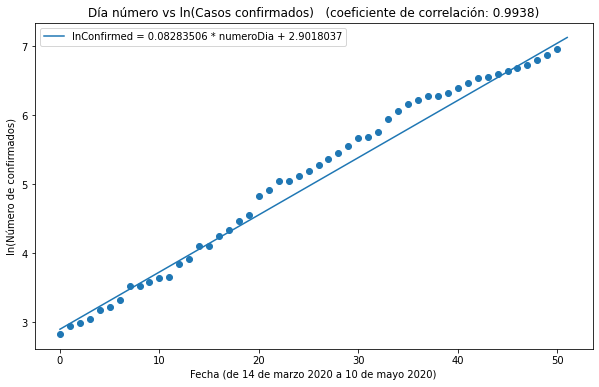

In [627]:
# Variables para trazar función de modelo encontrado
B0 = 2.9018037
B1 = 0.08283506
vX = np.linspace(0,51,510)
vY = vX * B1 + B0 
# Graficar logConfirmed vs número de días
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)    
ax.scatter(covidInformation["DateNumber"], covidInformation["lnConfirmed"])
ax.plot(vX,vY, label='Modelo y = ' + str(B1) + 'x + ' + str(B0))
ax.set_title('Día número vs ln(Casos confirmados)   (coeficiente de correlación: ' + str(coef) + ')')
plt.xlabel("Fecha (de 14 de marzo 2020 a 10 de mayo 2020)")
plt.ylabel("ln(Número de confirmados)")
plt.legend(["lnConfirmed = 0.08283506 * numeroDia + 2.9018037"])
plt.show()

In [638]:
# Crear función de predicción
def prediccionConfirmados(x):
    lnConf = 0.08283506 * x + 2.9018037
    return np.rint(np.exp(lnConf))

# Predicción para los próximos días hasta el 30 de mayo (30 mayo 2020 = 70)
dias_mayo = np.array([51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])
confirmados_mayo = prediccionConfirmados(dias_mayo)
predicciones = pd.DataFrame({'Días mayo (51 = 11 de mayo, 70 = 30 de mayo)': dias_mayo, 'Predicción confirmados': confirmados_mayo})
display(predicciones)

,"Días mayo (51 = 11 de mayo, 70 = 30 de mayo)",Predicción confirmados
0,51,1244.0
1,52,1352.0
2,53,1469.0
3,54,1595.0
4,55,1733.0
5,56,1883.0
6,57,2046.0
7,58,2222.0
8,59,2414.0
9,60,2623.0


### Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [639]:
informacionVino = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [640]:
informacionVino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,quality,alcohol,volatile acidity,sulphates,citric acid,total sulfur dioxide,density,chlorides,fixed acidity,pH,free sulfur dioxide,residual sugar
quality,1.000000,0.476166,-0.390558,0.251397,0.226373,-0.185100,-0.174919,-0.128907,0.124052,-0.057731,-0.050656,0.013732
alcohol,0.476166,1.000000,-0.202288,0.093595,0.109903,-0.205654,-0.496180,-0.221141,-0.061668,0.205633,-0.069408,0.042075
volatile acidity,-0.390558,-0.202288,1.000000,-0.260987,-0.552496,0.076470,0.022026,0.061298,-0.256131,0.234937,-0.010504,0.001918
sulphates,0.251397,0.093595,-0.260987,1.000000,0.312770,0.042947,0.148506,0.371260,0.183006,-0.196648,0.051658,0.005527
citric acid,0.226373,0.109903,-0.552496,0.312770,1.000000,0.035533,0.364947,0.203823,0.671703,-0.541904,-0.060978,0.143577
total sulfur dioxide,-0.185100,-0.205654,0.076470,0.042947,0.035533,1.000000,0.071269,0.047400,-0.113181,-0.066495,0.667666,0.203028
density,-0.174919,-0.496180,0.022026,0.148506,0.364947,0.071269,1.000000,0.200632,0.668047,-0.341699,-0.021946,0.355283
chlorides,-0.128907,-0.221141,0.061298,0.371260,0.203823,0.047400,0.200632,1.000000,0.093705,-0.265026,0.005562,0.055610
fixed acidity,0.124052,-0.061668,-0.256131,0.183006,0.671703,-0.113181,0.668047,0.093705,1.000000,-0.682978,-0.153794,0.114777
pH,-0.057731,0.205633,0.234937,-0.196648,-0.541904,-0.066495,-0.341699,-0.265026,-0.682978,1.000000,0.070377,-0.085652


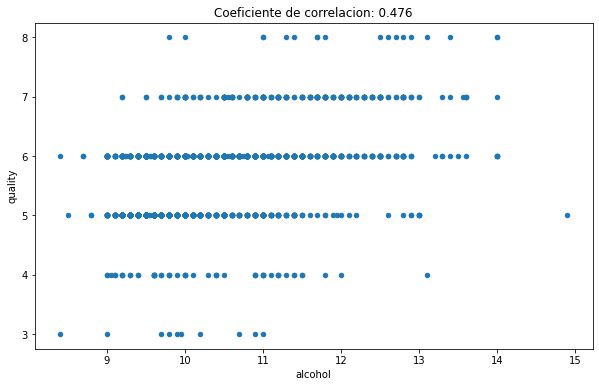

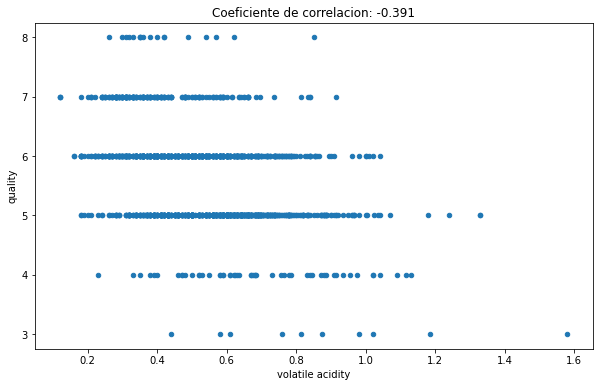

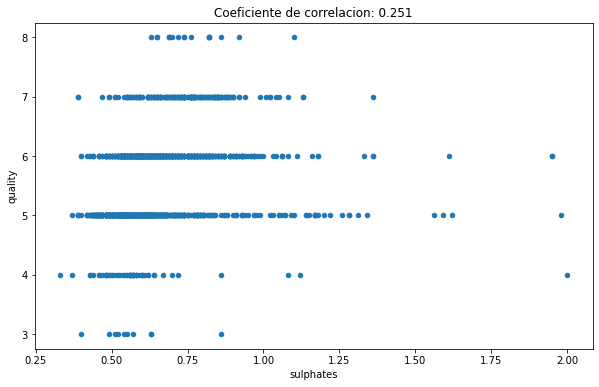

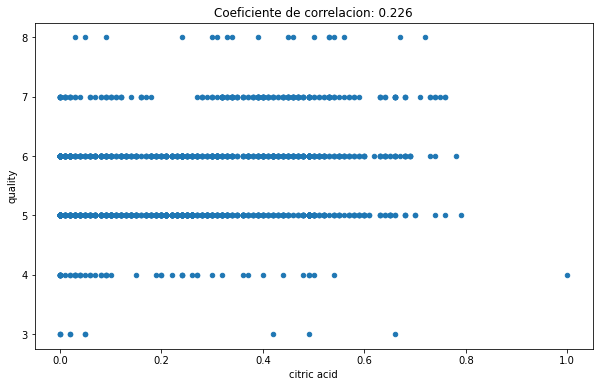

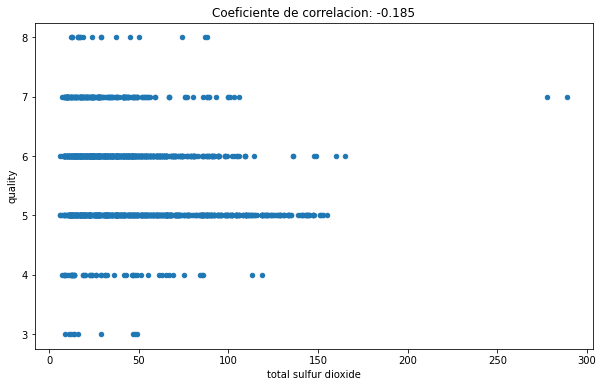

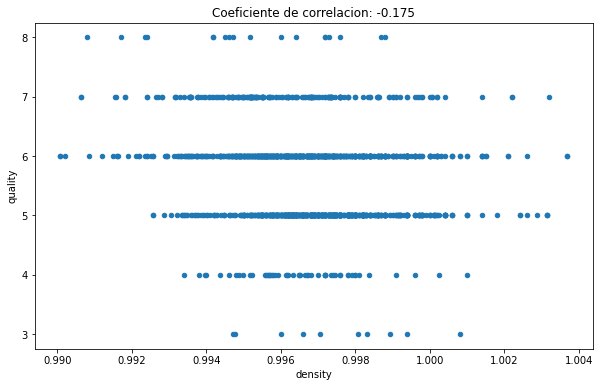

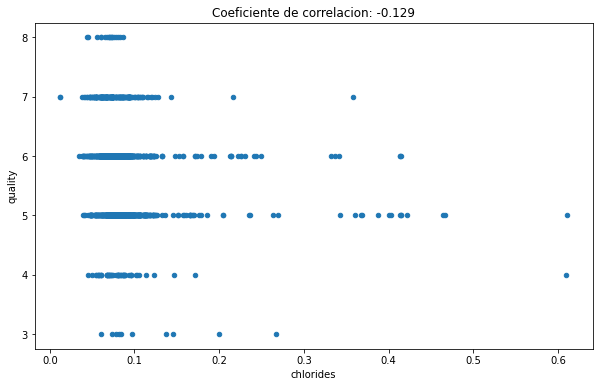

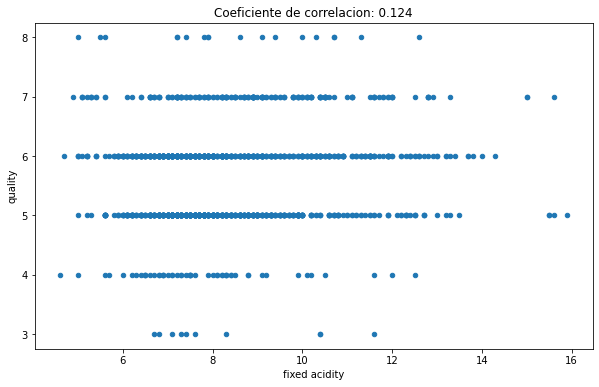

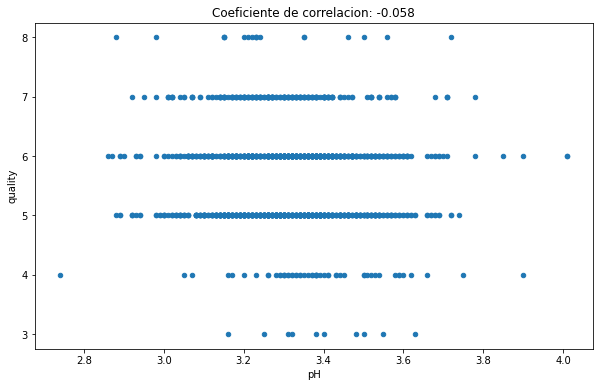

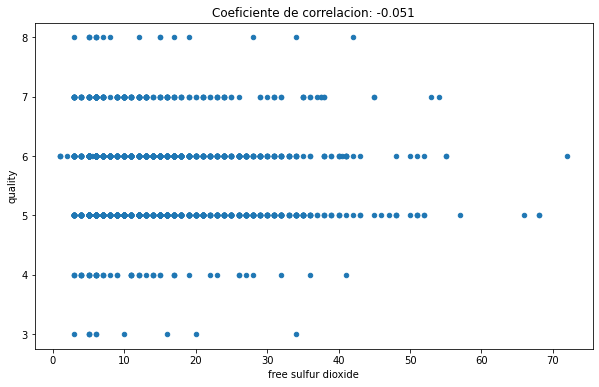

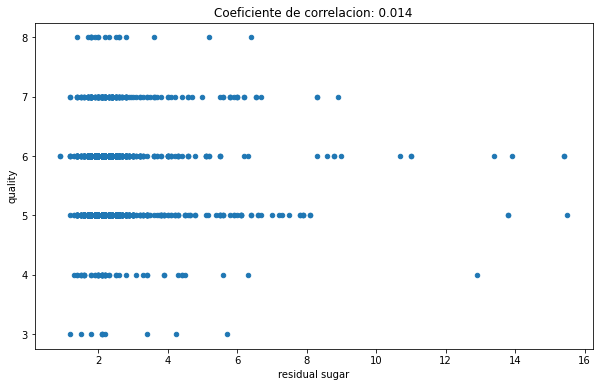

In [667]:
# Ordenar columnas de acuerdo al índice absoluto de correlación más elevado al más bajo
np.abs(informacionVino.corr()["quality"]).sort_values(ascending=False).index
informacionVino = informacionVino[np.abs(informacionVino.corr()["quality"]).sort_values(ascending=False).index]

# Visualización de variables en una gráfica x vs y
corrs = np.array(informacionVino.corr()["quality"])
for i in range(1, informacionVino.columns.size):
    informacionVino.plot.scatter(x = informacionVino.columns[i], y='quality', \
        figsize=(10,6), title='Coeficiente de correlacion: ' + str(np.round(corrs[i], 3)))
    
# Mostrar cuadro de correlaciones desde la variable con más correlación con "Quality" hasta la que menos relación muestra
display(informacionVino.corr())

### Variables escogidas, transformación y generación de modelo polinomial

Después de ver el cuadro de correlaciones ordenado y las gráficas, se escogerán las dos variables con mayor índice de correlación: Alcohol (correlación positiva) y acidez volátil (correlación negativa), sin embargo se debe indicar que los coeficientes son muy bajos de cualquier manera (0.48 y -0.39 respectivamente), por lo que se debe tener cuidado de la estructura del modelo que se encuentre.

In [688]:
# Dataset con variables escogidas
infoEscogida = pd.DataFrame(informacionVino, columns=['quality', 'alcohol', 'volatile acidity'])
infoEscogida['squareAlcohol'] = np.power(infoEscogida['alcohol'],2.0)
infoEscogida['squareVolatileAcidity'] = np.power(infoEscogida['volatile acidity'],2.0)
infoEscogida['alcoholTimesVolatileAcidity'] = infoEscogida['alcohol'] * infoEscogida['volatile acidity']
infoEscogida.head()

,quality,alcohol,volatile acidity,squareAlcohol,squareVolatileAcidity,alcoholTimesVolatileAcidity
0,5,9.4,0.70,88.36,0.4900,6.580
1,5,9.8,0.88,96.04,0.7744,8.624
2,5,9.8,0.76,96.04,0.5776,7.448
3,6,9.8,0.28,96.04,0.0784,2.744
4,5,9.4,0.70,88.36,0.4900,6.580


### Grafo definido para modelo

Se utilizará el mismo modelo creado en tensor flow de la parte 1 de esta práctica. Se muestra de nuevo el grafo de dicho modelo:
    
<img src='Grafo_Modelo_a_utilizar.png'>

In [773]:
# Datos para aplicar modelo lineal
x = infoEscogida[['alcohol', 'volatile acidity', 'squareAlcohol', 'squareVolatileAcidity', 'alcoholTimesVolatileAcidity']]
y = infoEscogida['quality']

# Variaciones de valores para learning rate
learning_rates = [0.00001, 0.00003, 0.00005]
epochs = [500]
bSizes = [8, 32, 128]

for lr in learning_rates:
    for ep in epochs:
        for bSize in bSizes:
            modeloLinealMiniBatch(x, y, ep, lr, bSize)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  1e-05 , Batch size:  8 , Error final:  0.28245187 , Parámetros:  [[ 0.49253437]
 [ 0.01899435]
 [ 0.0034264 ]
 [-0.01047724]
 [-0.03058465]
 [ 0.09066552]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  1e-05 , Batch size:  32 , Error final:  0.4274745 , Parámetros:  [[0.18044086]
 [0.01107265]
 [0.03018903]
 [0.00125044]
 [0.03238581]
 [0.0330301 ]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  500 , learning rate:  1e-05 , Batch size:  128 , Error final:  0.51691973 , Parámetros:  [[0.05525401]
 [0.00412792]
 [0.04299995]
 [0.00141332]
 [0.01902861]
 [0.00983586]]
INFO:tensorflow:Graph was finalized

### Algunos resultados

En la gráfica de abajo se puede observar que los mejores resultados se obtuvieron con un batch size pequeño (8) y que el error disminuía más rápido con un learning rate un poco más alto. Se realizará otra roda de pruebas para explorar si el error puede bajar aún más.

<img src='Graficas_de_errores_finales_por_modelo_4.png'>

In [774]:
# Variaciones de valores para learning rate
learning_rates = [0.00005, 0.00007, 0.0001]
epochs = [250]
bSizes = [4, 8, 16]

for lr in learning_rates:
    for ep in epochs:
        for bSize in bSizes:
            modeloLinealMiniBatch(x, y, ep, lr, bSize)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  250 , learning rate:  5e-05 , Batch size:  4 , Error final:  0.22283126 , Parámetros:  [[ 0.7820465 ]
 [ 0.02108705]
 [-0.01859348]
 [-0.02812842]
 [-0.10982297]
 [ 0.14305523]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  250 , learning rate:  5e-05 , Batch size:  8 , Error final:  0.22759348 , Parámetros:  [[ 0.70816314]
 [ 0.0225313 ]
 [-0.01304028]
 [-0.02295852]
 [-0.09268551]
 [ 0.13099015]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  250 , learning rate:  5e-05 , Batch size:  16 , Error final:  0.29958144 , Parámetros:  [[ 0.54682994]
 [ 0.02024026]
 [-0.00231984]
 [-0.01291035]
 [-0.04541063]
 [ 0.10075631]]
INFO:tensorflow:Graph wa

### Más resultados

Se puede confirmar que un número de batch pequeño ayuda en la disminución del error final (entre 4 y 8) y el learning rate parece que es mejor no elevarlo más de 0.00007. Se hará una ronda final de pruebas y se aumentará el número de epochs para ver si el error disminuye aún más.

<img src='Graficas_de_errores_finales_por_modelo_5.png'>

In [775]:
# Variaciones de valores para learning rate
learning_rates = [0.00005, 0.00006]
epochs = [1000]
bSizes = [4, 8]

for lr in learning_rates:
    for ep in epochs:
        for bSize in bSizes:
            modeloLinealMiniBatch(x, y, ep, lr, bSize)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  1000 , learning rate:  5e-05 , Batch size:  4 , Error final:  0.22272485 , Parámetros:  [[ 0.79371804]
 [ 0.01059939]
 [-0.01955521]
 [-0.04965263]
 [-0.10962299]
 [ 0.14279893]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  1000 , learning rate:  5e-05 , Batch size:  8 , Error final:  0.22229752 , Parámetros:  [[ 0.79585254]
 [ 0.02217259]
 [-0.01972965]
 [-0.03947429]
 [-0.1157622 ]
 [ 0.14853016]]
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Modelo MiniBatch. Epochs:  1000 , learning rate:  6e-05 , Batch size:  4 , Error final:  0.22283135 , Parámetros:  [[ 0.79894984]
 [ 0.00744089]
 [-0.01984335]
 [-0.05471632]
 [-0.11139984]
 [ 0.14159027]]
INFO:tensorflow:Graph 

### Resultados finales

Como muestra la gráfica, el error más pequeño que se encuentro fue de: 0.22229752, con los hiperparámetros: learning rate = 0.00005, batch size = 8, epochs = 1000. El modelo encontrado sería de:

* Q: quality (calidad del vino)
* A: alcohol
* V: Volatile acidity (acidez volátil)

$ Q = 0.7959 * A + 0.0222 * V - 0.0197 * A^2 - 0.0395 * V^2 - 0.1158 * A * V + 0.1485 $

<img src='Graficas_de_errores_finales_por_modelo_6.png'>